# Туториал по анализу тональности твитов

## Знакомимся с корпусом твитов

Возьмем за основу корпус русскоязычных твитов RuTweetCorp http://study.mokoron.com/

![RuTweetCorp](http://study.mokoron.com/wp-content/uploads/2014/01/bd1.png)

В корпусе есть разметка по тональности твитов на позитивные и негативные

In [ ]:
!wget http://vectors.nlpl.eu/repository/20/185.zip

!mv ./185.zip data/model_185.zip
!unzip data/data-20200219T170811Z-001.zip

In [ ]:
!pip install pymystem3, gensim

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# загружаем 5000 позитивных и негативных твитов

df_tweets = pd.read_csv('./data/tweets.csv')

In [ ]:
# TODO: сохраните в отдельный датафрейм по 5 примеров позитивных и негативных твитов (всего будет 10 твитов)

## Предобработка текстов

1. **Токенизация** (англ. *tokenization*) — разбиение текста на **токены**: отдельные фразы, слова, символы. 
2. **Лемматизация** (англ. *lemmatization*) — приведение слова к начальной форме (**лемме**).
3. **Удаление стоп-слов** — удаление частотных слов, в которых нет ценной семантики - местоимений, союзов, предлогов и т.д.

Функция лемматизации русского текста есть в библиотеках: 

- *pymorphy2* (англ. *python morphology,* «морфология для Python»), **
- *UDPipe* (англ. *universal dependencies pipeline*, «конвейер для построения общих зависимостей»*),*
- *pymystem3.*

In [ ]:
# реализуем метод очистки текста с удаление прочих символов кроме кириллицы

def clear_text(text):
    clean_text = re.sub(r'[^а-яА-ЯёЁ]',' ',text)
    clean_text = " ".join(clean_text.split())

In [ ]:
from pymystem3 import Mystem
m = Mystem()

In [ ]:
m.lemmatize("лемматизируй это")

In [ ]:
# TODO: реализуйте метод лемматизации, который возвращает строку лемматизированного текста 
#  (используйте ' '.join для склейки массива токенов в строку)

def lemmatize(text):
    pass

In [ ]:
# TODO: сделайте очистку текста и лемматизируйте выборку из 10 твитов


In [ ]:
# TODO: добавьте лемматизированный текст в виде нового столбца в датафрейм


In [ ]:
# лемматизация через mystem долгий процесс, загрузим корпус с лемматизированными твитами

df_tweets = pd.read_csv(".\\data\\tweets_lemm.csv")
df_tweets.shape

In [ ]:
# TODO: удалите дубликаты твитов из корпуса (а они там есть!)


In [ ]:
df_tweets.shape

In [ ]:
corpus = df_tweets['lemm_text'].values.astype('U')

In [ ]:
# для работы со стоп-словами используем готовые списки из библиотеки nltk
from nltk.corpus import stopwords as nltk_stopwords

stopwords = set(nltk_stopwords.words('russian'))

In [ ]:
# посмотрим, что считается стоп-словами

stopwords

## Мешок слов


Преобразовать слова в векторы поможет модель **«мешок слов»** (англ. *bag of words*). Она преобразует текст в вектор, не учитывая порядок слов. Отсюда и название — «мешок».

**Пример корпуса после лемматизации:**
[
	'ехать Гpека чеpез pека',
	'видеть Гpека в pека pак', 
	'сунуть Гpека pука в pека',
	'pак за pука Гpека цап'
]

**Мешок слов:**
['ехать', 'Гpека', 'чеpез', 'pека', 'видеть', 'в', 'pак', 'сунуть', 'pука', 'за', 'цап']

**Задание**
Какой вектор описывает лемматизированный текст **«видеть Гpека в pека pак»** ?





In [ ]:
corpus_greka = [
    'ехать Гpека чеpез pека',
    'видеть Гpека в pека pак', 
    'сунуть Гpека pука в pека',
    'pак за pука Гpека цап'
]

## N-граммы

**N-грамма** — это последовательность из нескольких слов. N указывает на количество элементов и может быть любым. 

Например, если N равно 1, получаются слова, или **униграммы** (лат. unus, «один»). 
При N=2 учитываются словосочетания из двух слов — **биграммы** (лат. bis, «дважды»). 
Если N=3, то это уже **триграммы** (лат. tres, «три»), т.е. из трёх слов.

**Задание**
Сколько биграмм в тексте **«видеть Гpека в pека pак»** ? 
А триграмм?

In [ ]:
# создаем мешок слов

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

# bow, от англ. bag of words
bow = count_vect.fit_transform(corpus_greka)

print(bow.toarray())

Список уникальных слов в мешке образует **словарь**. Он хранится в счётчике и вызывается методом *get_feature_names()* 

In [ ]:
count_vect.get_feature_names()

In [ ]:
# TODO: Сформируйте мешок слов на корпусе твитов без учета стоп-слов (см. параметры CountVectorizer)


In [ ]:
# TODO: Выведите словарь. Каков размер словаря?


## Векторизуем твиты с помощью меры TF-IDF

> Мешок слов учитывает частоту употребления слов. Посмотрим, как часто уникальное слово встречается во всём корпусе и в отдельном его тексте.

Оценка важности слова определяется величиной **TF-IDF** (от англ. *term frequency*, «частота терма, или слова»; *inverse document frequency,* «обратная частота документа, или текста»). 

То есть *TF* отвечает за количество упоминаний слова в отдельном тексте, а *IDF* отражает частоту его употребления во всём корпусе.

$$TFIDF = TF * IDF$$

$$TF = \frac{t}{n}$$

$$IDF = \log_{10}(\frac{D}{d})$$

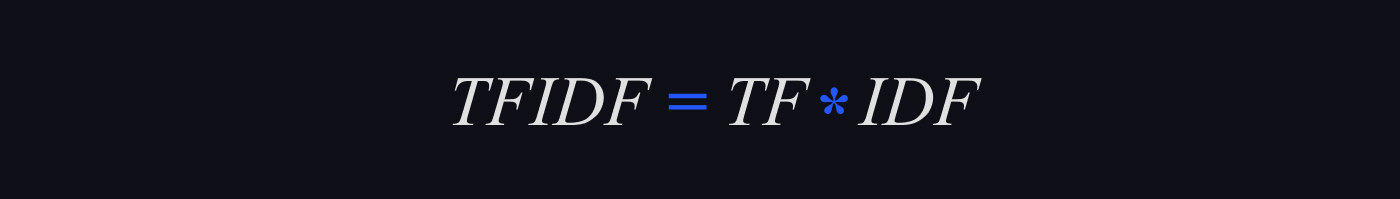

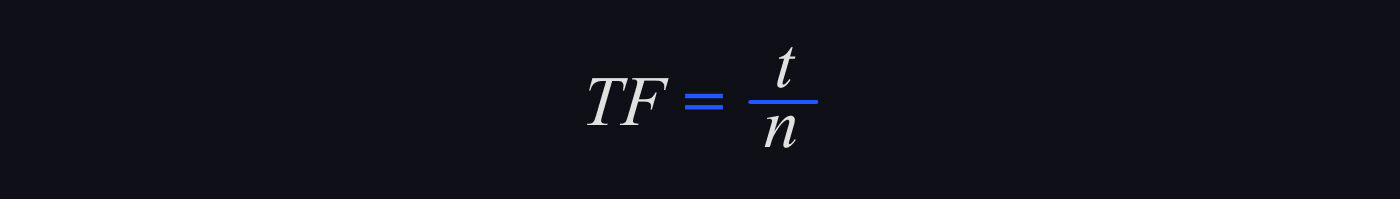

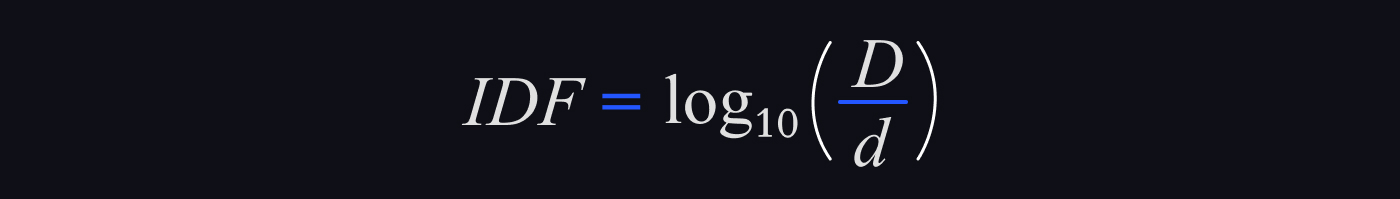

**TODO:**  Определите TF-IDF для слова *"рак"*

In [ ]:
# давайте векторизуем твиты с помощью TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

In [ ]:
# получите матрицу с векторами TF-IDF для текстового корпуса

tf_idf = count_tf_idf.fit_transform(corpus)
print("Размер матрицы:", tf_idf.shape)

In [ ]:
# обучите логистическую регрессию различать позитив и негатив и сделайте оценку метрики accuracy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# TODO: Проверьте, можно ли улучшить качество классификации с помощью биграмм? 
# Используйте параметр ngram_range у TfidfVectorizer


## Оценка важности слов

> После обучения у каждого слова есть оценка: позитивное оно или негативное.

Оценки — это коэффициенты логистической регрессии, которую вы обучили. Если оценка больше нуля, слово положительное. Чем больше коэффициент, тем больше влияние слова на предсказание. Когда оценка меньше нуля, слово отрицательное.

Список слов — это имена столбцов в датасете признаков. Значения коэффициентов хранятся в параметре `coef_`  модели.

Список слов и список их коэффициентов можно объединить в один массив функцией **zip()** (англ. «застёгивать»), а результат преобразовать в список функцией `list()`. Работает так:

In [ ]:
words = ['a', 'b', 'c']
coefs = [-1, 2, 3]
list(zip(words, coefs))

In [ ]:
# TODO: Найдите 10 самых положительных и самых негативных слов по результатам обучения модели. 
# Это слова с наибольшими коэффициентами регрессии.

coefs = zip(features.columns, model.coef_[0])
top_10_positive = sorted(coefs, key=lambda x: -x[1])[:10]

print(top_10_positive)

## Дистрибутивная семантика. Word Embeddings. Word2vec

![word2vector](https://habrastorage.org/webt/uk/zh/h0/ukzhh0kwiptrhim7tygo1vh5vwq.png)

https://habr.com/ru/post/446530/


In [ ]:
from gensim.models import Word2Vec
import gensim

### Предобученные модели

https://rusvectores.org/ru/models/

In [ ]:
# загрузим русскоязычную модель с сайта rusvectores
# выберем модель **tayga_upos_skipgram_300_2_2019**

import zipfile

model_file = './data/model_185.zip'
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    wv = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

In [ ]:
# посмотрим словарь модели

wv.vocab

In [ ]:
# TODO: Попробуйте найти синонимы слов с помощью библиотеки gensim и обученного w2v
# Сделать это можно с помощью wv.most.similar() (рекомендуем ознакомиться с документацией этого метода)
wv.most_similar()

![Визуализация w2v](https://docs.cortext.net/wp-content/uploads/2016/09/Capture-d’écran-2016-09-13-à-11.20.56-1024x749.png)

[Визуализация w2v](https://documents.cortext.net/lib/W2Vexplorer/index.html?config=https://assets.cortext.net/docs/6542799fe444b443e89585491432550a#)

![Свойства w2v](https://i0.wp.com/migsena.com/wp-content/uploads/2017/09/word2vec.png?zoom=2&w=660)

## Нужно добавить про игру с векторами (король/королева и т.д.)

In [ ]:
# TODO: Воспроизведите взаимосвязь слов по аналогии с рисунком
wv.most_similar(positive=['отец_NOUN', 'мужчина_PROPN'], negative=['сын_NOUN'])

In [ ]:
# загрузим большой корпус твитов с лемматизацией и токенизацией для word2vec
from ast import literal_eval

df_tweets = pd.read_csv('./data/tweets_full_tags.csv', sep=';', converters={"tags": literal_eval})

In [ ]:
df_tweets

In [ ]:
df_tweets['tags'][0]

In [ ]:
# word2vec выдает вектора для слов, а как быть с вектором текста?
# давайте просто возьмем средний вектор всех слов в твите

def word_averaging(words, wv):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        if word in wv.vocab:
            mean.append(wv.get_vector(word))
            all_words.add(wv.vocab[word].index)

    if not mean:
        # print("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(300,)
    mean = np.array(mean).mean(axis=0)
    return mean, all_words

In [ ]:
# вычислим вектора твитов на всем корпусе

df_tweets['vec'] = df_tweets['tags'].apply(word_averaging, args=(wv,))

In [ ]:
# обучите классификатор тональности твитов на усредненных векторах word2vec (удалите нулевые вектора предварительно)

y = df_tweets['positive']
X = np.array(df_tweets['vec'].tolist())

## Контекстуализированные представления. Революция трансформеров. BERT

![Bert](https://www.searchengines.ru/wp-content/uploads/2019/10/1_-oQKmzvHrzqeSQEnM9f_kQ.png)

https://habr.com/ru/post/436878/

И свежая статья https://m.habr.com/ru/amp/post/487358/


In [ ]:
import torch
import transformers as ppb # pytorch transformers

In [ ]:
# создаем токенайзер для модели BERT, для его инициализации достаточно указать словарь, на котором обучалась предобученная модель
# BERT использует собственную токенизацию, никакой предобработки 

tokenizer = ppb.BertTokenizer(vocab_file='./Rubert/vocab.txt')

In [ ]:
# токенизируем текст каждого твита, для BERT не требуется никакая дополнительная предобработка, лемматизация и прочее

tokenized = df_tweets['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)) )

In [ ]:
# Пример токенизации текста: на входе - текст, а на выходе имеем массив с номерами токенов из словаря модели BERT

print(df_tweets['text'][0])
print(tokenized[0])
print(tokenizer.tokenize(df_tweets['text'][0]))

In [ ]:
# инициализируем предобученную модель RuBERT из файла, 
# в json-файле конфигурации описаны параметры модели

config = ppb.BertConfig.from_json_file('./Rubert/bert_config.json')
model = ppb.BertModel.from_pretrained('./Rubert/rubert_model.bin', config = config)

In [ ]:
# из-за того, что каждый твит в датасете имеет разную длину (количество токенов)
# мы делаем паддинг - заполнение нулями каждого массива токенов до длины максимального массива
# чтобы на выходе получить матрицу из токенизированных текстов одной длины

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
# посмотрим на размерность матрицы токенизированных твитов после паддинга

np.array(padded).shape

In [ ]:
# Накладываем маску на значимые токены
# В данном случае нам важны все слова кроме нулевых токенов, появившихся на предыдущем шаге паддинга

attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

![Кол-во параметров](https://miro.medium.com/max/4140/1*IFVX74cEe8U5D1GveL1uZA.png)

Одни из самых больших NLP моделей и их количество параметров в **милионах**

In [ ]:
# а теперь сформируем вектора текстов с помощью модели RuBERT

# это не быстрый процесс, импортируем инструмент для визуализации времени обработки в цикле
from tqdm import notebook

# для того, чтобы модель отработала в условиях ограниченных ресурсов - оперативной памяти, мы разделяем входной датасет на батчи.
# при батче в 100 твитов потребление оперативной памяти укладывается в 1Гб
batch_size = 100

# Делаем пустой список для хранения эмбеддингов (векторов) твитов
embeddings = []

for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        # преобразуем батч с токенизированными твитами в тензор 
        # по сути тензор - это многомерный массив, который может быть обработан нейронной сетью
        input_ids = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        
        # создаем тензор и для подготовленной маски
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        # передаем в модель BERT тензор из твитов и маску - на выходе получаем эмбеддинги - вектор текста твита
        # torch.no_grad() - для ускорения инференса модели отключим рассчет градиентов
        with torch.no_grad():
            last_hidden_states = model(input_ids, attention_mask=attention_mask_batch)
        
        # в итоге собираем все эмбеддинги твитов в features
        embeddings.append(last_hidden_states[0][:,0,:].numpy())



In [ ]:
# преобразуем список батчей эмбеддингов в numpy-матрицу 
features = np.concatenate(embeddings)

In [ ]:
# выводим размерность полученной матрицы эмбеддингов
# данная модель BERT формирует вектора текстов в 768-мерном пространстве признаков
features.shape

In [ ]:
# Выводим пример эмбеддинга для твита - осторожно много цифр!

print(df_tweets['text'][0])
print(features[0])

In [ ]:
# Импортируем необходимые библиотеки для обучения классификатора на logreg и оценки качества

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# Сохраним целевую переменную: метку тональности позитив/негатив

labels = df_tweets['positive']

In [ ]:
# Разделяем матрицу признаков и целевую переменную на обучающий и тестовый набор

train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
# обучаем классификатор на основе логистической регрессии

lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

In [ ]:
# делаем пробное предсказание
tweet_index = 555

print('Text: ' + df_tweets['text'][tweet_index])
print('Predict label: ', lr_clf.predict(features[tweet_index:tweet_index+1][:])[0])
print('True label: ', df_tweets['positive'][tweet_index])


In [ ]:
# оцениваем accuracy на тестовой выборке

lr_clf.score(test_features, test_labels)